In [7]:
import scipy.signal as signal
from pylab import *
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller


In [1]:
def extract_currency(x):
    if isinstance(x, str):
        return(x.replace('%', '').replace(',', ''))
    return(x)


In [11]:

#funcion que que permite crear y graficar la respuesta en frecuencia de un filtro     
def mfreqz(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    h_pot = abs(h)
    
    plt.figure(figsize=(18,8))
    subplot(311)
    plot(w/max(w),h_dB)
    ylabel('Magnitude (db)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Frequency response')


    subplot(312)
    plot(w/max(w),h_pot)
    ylabel('Magnitude (W)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Frequency response')

    subplot(313)
    
    h_Phase =  np.angle(h)  #unwrap(arctan2(imag(h),real(h)))
   
    plot(w/max(w),h_Phase)
    ylabel('Phase (radians)')
    #xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Phase response')
    subplots_adjust(hspace=0.5)
    show()


def impz(b,a=1):
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = signal.lfilter(b,a,impulse)
    
    plt.figure(figsize=(12,5))
    subplot(211)
    stem(x, response)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Impulse response')
    subplot(212)
    step = cumsum(response)
    stem(x, step)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Step response')
    subplots_adjust(hspace=0.5)
    show()
def zeropoles(b, a=1):
    w,h = signal.freqz(b,a)
    sys1=signal.lti(b, a)
    #subplot(121)
    #plot(h.real, h.imag)
    #plot(h.real, -h.imag)
    #subplot(122)
    ang=np.arange(0.0,2*np.pi,0.01)
    xp=np.cos(ang)
    yp=np.sin(ang)
    plot(xp,yp,'--')
    plot(sys1.zeros.real, sys1.zeros.imag, 'o')
    plot(sys1.poles.real, sys1.poles.imag, 'x')
    #xlim(np.min(sys1.zeros.imag)-1, np.max(sys1.zeros.imag)+1)
    #ylim(np.min(sys1.zeros.imag)-1, np.max(sys1.zeros.imag)+1)
    show()

<h1>1. INTRODUCCIÓN</h1>
<p>En este laboratorio se pretende afianzar los conceptos relacionados con el an´alisis de las series de tiempo,
filtro de media móvil y filtro de primera diferencia.
</p>


<h2>2. Análisis de series de tiempo</h2>

<h3>2.1 Procedimiento</h3>

<p>
1. La se˜nal corresponde a datos del la tasa de cambio representativa del mercado (TRM), la cual mide
la cantidad de pesos colombianos por un d´olar de los Estados Unidos. El archivo historical TRM.csv
contiene 6 columnas con la siguiente informaci´on:

<li>Fecha</li>
<li>Precio</li>
<li>Apertura</li>
<li>Máximo</li>
<li>Mínimo</li>
<li>Cambio</li>
</p>

In [41]:
datos = pd.read_csv('historical_TRM.csv', delimiter=',') # Lectura archivo.
price  =  np.array(datos['Precio'].apply(extract_currency).astype('float'))[::-1]  
tiempo =  np.array(datos['Fecha'])[::-1]
cambio =  np.array(datos['Cambio'].apply(extract_currency).astype('float'))[::-1]

In [42]:
datos['Fecha']=pd.to_datetime(datos['Fecha'])
datos=datos.sort_values(by ='Fecha', ascending=True)
diferente_tiempo=datos['Fecha'].diff().dropna()
promedio_fecha=diferente_tiempo.mean()
#Ahora en dias, mes y años se tiene
print(f"El período de muestreo promedio es de {promedio_fecha.days} días, o {promedio_fecha.days/7:.2f} semanas, o {promedio_fecha.days/365.25:.2f} años.")



El período de muestreo promedio es de 7 días, o 1.00 semanas, o 0.02 años.


<p>Grafique la se˜nal Precio en funci´on del tiempo y presente un an´alisis sobre la misma.</p>

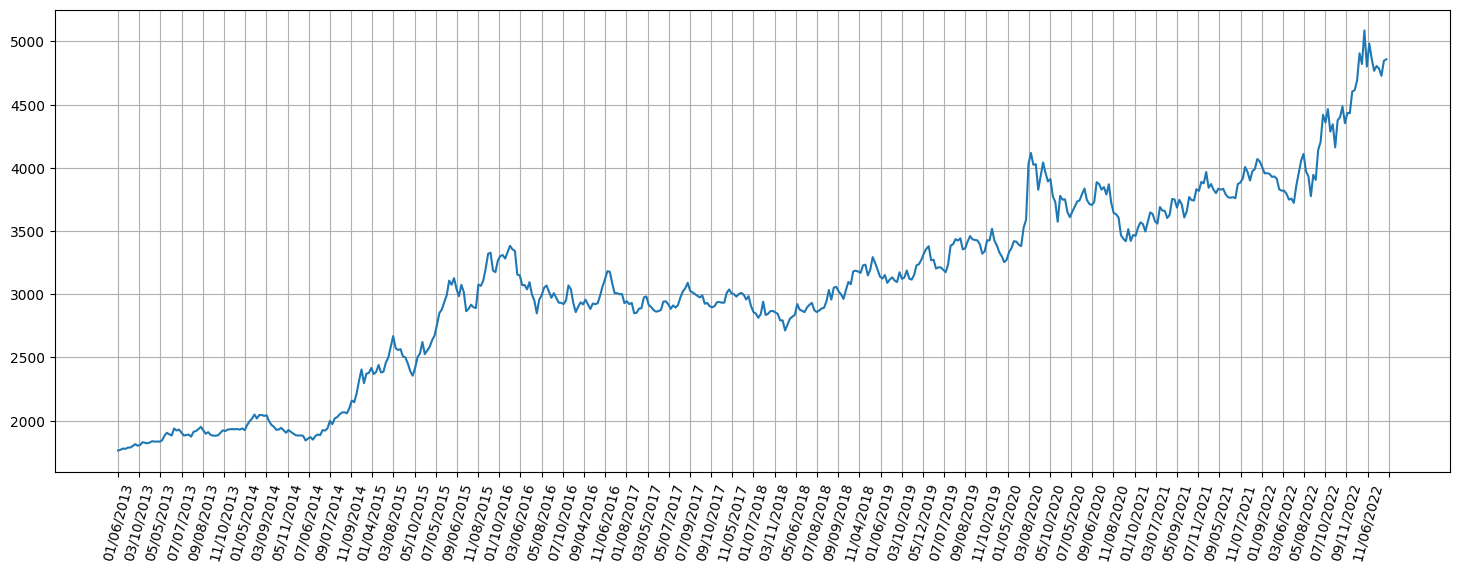

In [35]:
plt.figure(figsize=(18,6))
plt.plot( tiempo,  price)
plt.tick_params(axis='x' , rotation=75)
plt.xticks(list(np.arange(0,len(tiempo),len(tiempo)/60))) 
plt.grid()
plt.show()

<p>Según lo que se puede apreciar en la grafica, nos muestra el comportamiento de la moneda colombiana al cambio con el dolar, entonces se puede ver que a medida  que va 
pasando el tiempo, vemos una tendencia al alza de la divisa con el paso del tiempo.</p>

<p> 4. Grafique la se˜nal Cambio en funci´on del tiempo y presente un an´alisis sobre la misma.
</p>

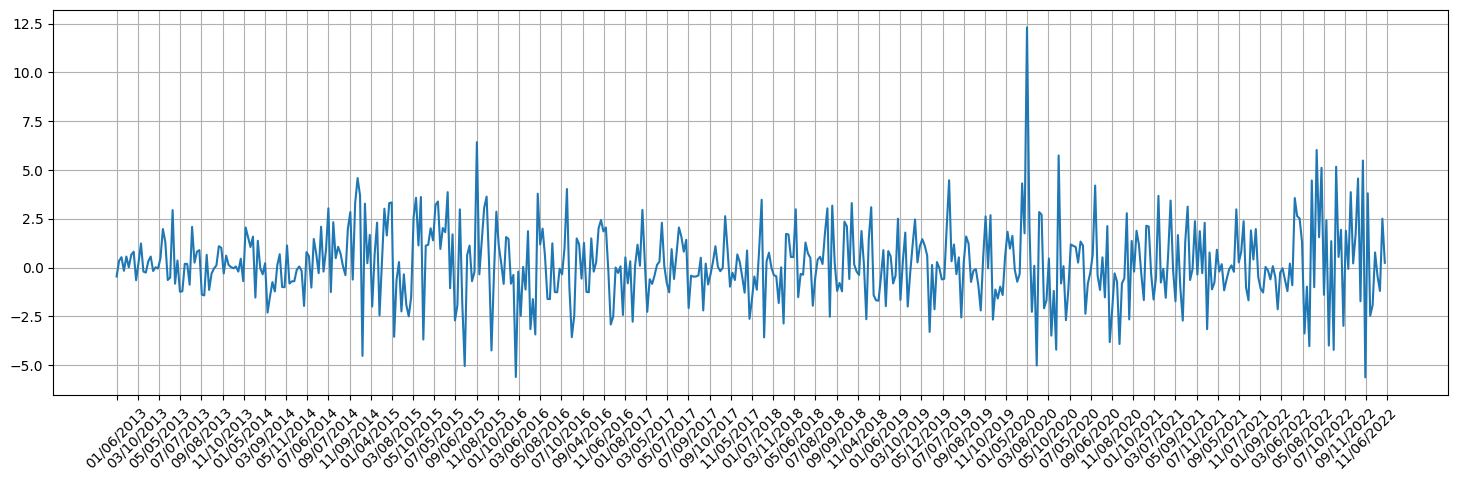

In [43]:
plt.figure(figsize=(18,5))
plt.plot( tiempo,  cambio)
plt.tick_params(axis='x' , rotation=45)
plt.xticks(list(np.arange(0,len(tiempo),len(tiempo)/60)))  
plt.grid()
plt.show()

<p>
En lo que respecta al gráfico de cambio, da una razón a entender que tan estable se encuentra la divisa en periodos de tiempo, por ejemplo. se puede ver unos picos considerablemenbte mayores en algunos instantes de tiempo, esto significa que el algún momento la divisa se disparó o al contrario decayó abruptamente
</p>

<p>
Calcule la autocorrelaci´on de la se˜nal Precio y la correlacion con la se˜nal Cambio. ¿Que puede concluir
del resultado?

</p>

<li>Autocorrelación del precio</li>

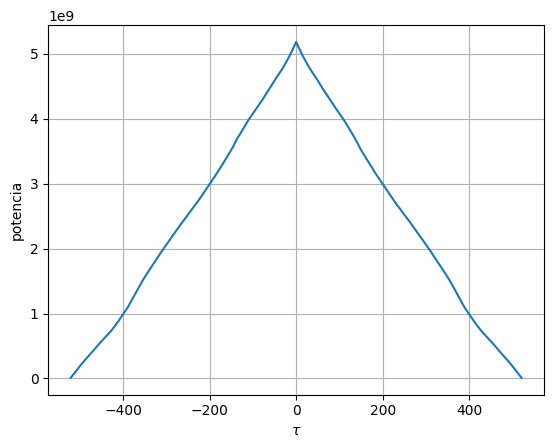

In [45]:
Rxx=np.correlate(price, price, mode='full')
tau=np.arange(-len(price)+1,len(price),1) # vector de retraso
plt.plot(tau,Rxx)
plt.xlabel(r'$\tau$')
plt.ylabel('potencia')
plt.grid()
plt.show()

<li>Correlación con señal de cambio</li>

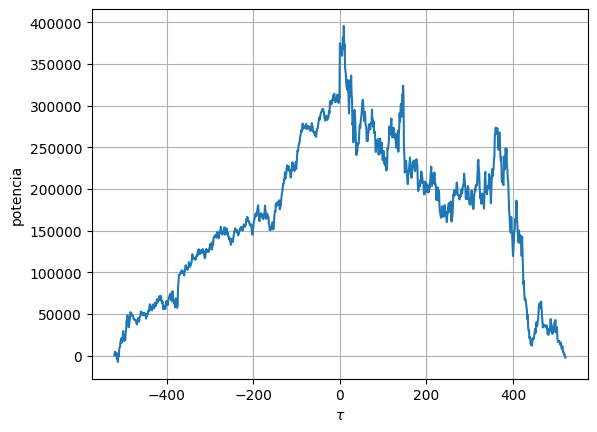

In [46]:
Rxy=np.correlate(price, cambio, mode='full')
plt.plot(tau,Rxy)
plt.xlabel(r'$\tau$')
plt.ylabel('potencia')
plt.grid()
plt.show()

<p>
<li>En lo que respecta a las graficas, tenemos una relación lineal entre los patrones de cambio y de precio, por ejemplo, vemos que en el punto cero de las graficas se tiene una relación completa entre lo que le pasa a la moneda y su tasa de cambio.
</li>
<li>
Puede verse como un comportamiento que tiene que ver con lo que pasa actualmente, en el pasado y una predicción del comportamiento a futuro de las divisas. Otro ejemplo de ello puede ser por ejemplo el comportamiento del clima durante una semana, etc.
</li>
</p>

In [48]:

# Cargar tus datos en dos DataFrames (por ejemplo, df1 y df2)
# Asegúrate de que tus datos sean series temporales en formato DataFrame con una columna de fechas o índices de tiempo.

# Realizar el test de Dickey-Fuller para la primera señal (df1)
result1 = adfuller(price)

# Imprimir el resultado
print("Resultado para el precio:")
print("Estadística de prueba:", result1[0])
print("Valor p:", result1[1])
print("Valores críticos:", result1[4])

# Realizar el test de Dickey-Fuller para la segunda señal (df2)
result2 = adfuller(cambio)

# Imprimir el resultado
print("\nResultado para el cambio:")
print("Estadística de prueba:", result2[0])
print("Valor p:", result2[1])
print("Valores críticos:", result2[4])

Resultado para el precio:
Estadística de prueba: 0.3031204192267247
Valor p: 0.9774871972556076
Valores críticos: {'1%': -3.4433139398425348, '5%': -2.867257567756961, '10%': -2.5698152474041915}

Resultado para el cambio:
Estadística de prueba: -13.470518522141994
Valor p: 3.3895828673747505e-25
Valores críticos: {'1%': -3.4430126933746767, '5%': -2.8671249839002764, '10%': -2.569744590233924}


<p>
Con el test de Fuller, por ejemplo para la señal de <strong>precio</strong> nos dice que se trata de una señal no estacionaria, la cual va a mostrar cambios en sus propiedades estadisticas a lo largo del tiempo. Esto se puede manifestar en tendencias,patrones estaciones o ciclos que hacen que la serie tengan una media o varianza que varian con el tiempo. 
Por otro lado, la señal de <strong>cambio</strong>es estacionaria según su p-value, lo cual puede indicar que la señal no va a tener cambios en su media y varianza de forma significativa a medida que pasa el tiempo. 
</p>

<h2>3.  Filtro de media movil</h2>